## **DATA VISUALIZATION STARTS AT CELL 5 ONWARDS**
tell me if you want any clarification or customization on the visualizations

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import sklearn
import math

In [2]:
# df = pd.read_csv('2-9_Jan_2019.csv')

# df_jan = pd.read_csv('all_usage_jan_2019.csv')
# df_feb = pd.read_csv('all_usage_feb_2019.csv')
# df_mar = pd.read_csv('all_usage_mar_2019.csv')
# df_apr = pd.read_csv('all_usage_apr_2019.csv')
# df_may = pd.read_csv('all_usage_may_2019.csv')
# df_jun = pd.read_csv('all_usage_jun_2019.csv')
# df_jul = pd.read_csv('all_usage_jul_2019.csv')
# df_aug = pd.read_csv('all_usage_aug_2019.csv')
# df_sep = pd.read_csv('all_usage_sep_2019.csv')

df_all = pd.read_csv('all_usage_Jan_to_Sep_new.csv')
df_merged = pd.read_csv('merged.csv')
# df_open = pd.read_csv('all_usage_open_new.csv')
# df_open_merged = pd.read_csv('usage_and_failed_open_sem.csv')
# df_close = pd.read_csv('all_usage_close_new.csv')
# df_close_merged = pd.read_csv('usage_and_failed_close_sem.csv')

# df_merged_no_hol = pd.read_csv('no_hol_v2_edited.csv')
# df_2018s2 = pd.read_csv('2018_2_no_exam.csv')
# df_2019s1 = pd.read_csv('2019_1.csv')
# df_closed = pd.read_csv('closed_semester.csv')

# df_2018s2_usage = pd.read_csv('2018s2_usage.csv')
# df_2019s1_usage = pd.read_csv('2019s1_usage.csv')

In [ ]:
cellStart = []
for cell in df['start_dt_ICT']:
    (h, m, s) = cell.split(':')
    cell = int(h) + int(m)/60 + int(s)/3600
    cellStart.append(cell)
    #print(cellStart)

df.fillna(value=0, inplace=True)
cellEnd = []
i = 0
for cell in df['end_dt_ICT']:
    if cell == 0:
        cellEnd.append(cellStart[i])
    else:
        (h, m, s) = cell.split(':')
        cell = int(h) + int(m)/60 + int(s)/3600
        cellEnd.append(cell)
    i=i+1
    #print(cellEnd)
    
cellDepart = df.loc[ : , 'Station_depart.' ]
cellDest = df.loc[ : , 'Station_dest.' ]
cellVehicle = df.loc[ : , 'Vehicle name' ]
cellDate = df.loc[ : , 'Date' ]

## **OCCUPATION AND USAGE ON THE DAYS**
*we can focus only on CU Student*

In [ ]:
df_all2 = df_all.pivot_table(index='Occupation', columns='Date', values='Usage\'', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_all2, cmap=sns.color_palette("Blues"))
df_all['Date']

## **ALL TRANSATIONSACTIONS MADE BY CU STUDENTS**
*DEPARTING AND DESTINATION STATIONS OF ALL 9 MONTHS*

In [ ]:
df_all5 = df_all.query('Occupation == "University student (CU)"')
df_all6 = df_all5.pivot_table(index='Station_depart.', columns='Station_dest.', values='Usage\'', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_all6, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)

In [ ]:
demand = []
demand = [1] * len(df_2018s2)
df_2018s2['Demand'] = demand

df_12 = df_2018s2.pivot_table(index='Station_depart.', columns='Station_dest.', values='Demand', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_12, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)

***BASED ON REGISTERING/STARTING TIME***

In [ ]:
converted_regist = []

for slot in df_all['regist_dt_ICT']:
    (h, m, s) = slot.split(':')
    cell = int(h) + int(m)/60 + int(s)/3600
    converted_regist.append(math.floor(cell))    

df_all['Converted_Regist'] = converted_regist

df_all7 = df_all.query('Occupation == "University student (CU)"')
# and Converted_Regist < 13
df_all8 = df_all7.pivot_table(index='Station_depart.', columns='Station_dest.', values='Usage\'', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_all8, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)

In [8]:
converted_regist = []

for slot in df_merged['regist_dt_ICT']:
    (h, m) = slot.split(':')
    converted_regist.append(int(h))
    
df_merged['Converted_Regist'] = converted_regist

failed = []
for a,b in zip(df_merged['start_dt_ICT'],df_merged['end_dt_ICT']):
    if(pd.isnull(a) and pd.isnull(b)):
        failed.append('failed search')
    else:
        failed.append('usage')
    
df_merged['Failed'] = failed
df_merged

,Date,full_date,day_of_week,academic_calendar_time,is_exam_time,regist_dt_ICT,date_time,start_dt_ICT,end_dt_ICT,Customer_ID,...,Station_dest.,Station_depart_code,Station_dest_code,Trip,group_by_30min,group_by_1hour,is_lunch_break,is_class_time,Converted_Regist,Failed
0,2019-01-01,Tuesday 01 Jan 2019,Tuesday,Holiday,NORMAL,14:07,2019-01-01 14:07,NaN,NaN,CP#0T5S2,...,13 Suan Luang square,9,13,913,2019-01-01 14:00,2019-01-01 14:00,NO,YES,14,failed search
1,2019-01-01,Tuesday 01 Jan 2019,Tuesday,Holiday,NORMAL,08:45,2019-01-01 08:45,NaN,NaN,CP#0R5H5,...,12 CU Terrace,12,12,1212,2019-01-01 08:30,2019-01-01 08:00,NO,NO,8,failed search
2,2019-01-02,Wednesday 02 Jan 2019,Wednesday,Holiday,NORMAL,16:16,2019-01-02 16:16,16:17,16:55,CP#0TMT0,...,02 Economics,15,2,1502,2019-01-02 16:00,2019-01-02 16:00,NO,NO,16,usage
3,2019-01-02,Wednesday 02 Jan 2019,Wednesday,Holiday,NORMAL,13:52,2019-01-02 13:52,14:11,14:15,CP#0PTF0,...,07 Chamchuri 5,21,7,2107,2019-01-02 13:30,2019-01-02 13:00,NO,YES,13,usage
4,2019-01-02,Wednesday 02 Jan 2019,Wednesday,Holiday,NORMAL,13:05,2019-01-02 13:05,13:05,13:12,CP#0RST8,...,03 Sala Prakeaw,22,3,2203,2019-01-02 13:00,2019-01-02 13:00,NO,YES,13,usage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19794,2019-02-28,"Thursday, 28 February 2019",Thursday,2018/2 semester,NORMAL,18:25,2019-02-28 18:25,18:28,18:35,CP#0V2L2,...,01 Exit to Cham square,22,1,2201,NaN,NaN,NO,NO,18,usage
19795,2019-02-28,"Thursday, 28 February 2019",Thursday,2018/2 semester,NORMAL,18:31,2019-02-28 18:31,NaN,NaN,CP#0T2C8,...,09 Chamchuri 10,2,9,209,NaN,NaN,NO,NO,18,failed search
19796,2019-02-28,"Thursday, 28 February 2019",Thursday,2018/2 semester,NORMAL,18:37,2019-02-28 18:37,18:39,18:50,CP#0PFZ2,...,15 U Center,7,15,715,NaN,NaN,NO,NO,18,usage
19797,2019-02-28,"Thursday, 28 February 2019",Thursday,2018/2 semester,NORMAL,18:37,2019-02-28 18:37,18:38,18:43,CP#0Q1G0,...,17 Property office,21,17,2117,NaN,NaN,NO,NO,18,usage


In [9]:
df_merged.to_csv(r'merged with indicators', index = False)

In [ ]:
#AFTER 7 PM
usage = []
for na in df_merged_no_hol['start_dt_ICT']:
    if pd.isnull(na):
        usage.append(0)
    else:
        usage.append(1)
usage
df_merged_no_hol['Usage'] = usage

converted_regist = []
for slot in df_merged_no_hol['regist_dt_ICT']:
    (h, m, s) = slot.split(':')
    cell = int(h) + int(m)/60 + int(s)/3600
    converted_regist.append(math.floor(cell))    

df_merged_no_hol['Converted_Regist'] = converted_regist
df_all7 = df_merged_no_hol.query('Converted_Regist > 19')
df_all8 = df_all7.pivot_table(index='Station_depart.', columns='Station_dest.', values='Usage', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_all8, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)

In [ ]:
converted_start = []

for slot in df_all['start_dt_ICT']:
    (h, m, s) = slot.split(':')
    cell = int(h) + int(m)/60 + int(s)/3600
    converted_start.append(math.floor(cell))    

df_all['Converted_Start'] = converted_start

df_all9 = df_all.query('Occupation == "University student (CU)" and Converted_Start < 13')
df_all10 = df_all9.pivot_table(index='Station_depart.', columns='Station_dest.', values='Usage\'', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_all10, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)

***RELOCATION ROUTE OF A VEHICLE FROM A STATION TO ANOTHER STATION***

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

Text(0.5, 1.0, 'Relocations of Vehicle 1')

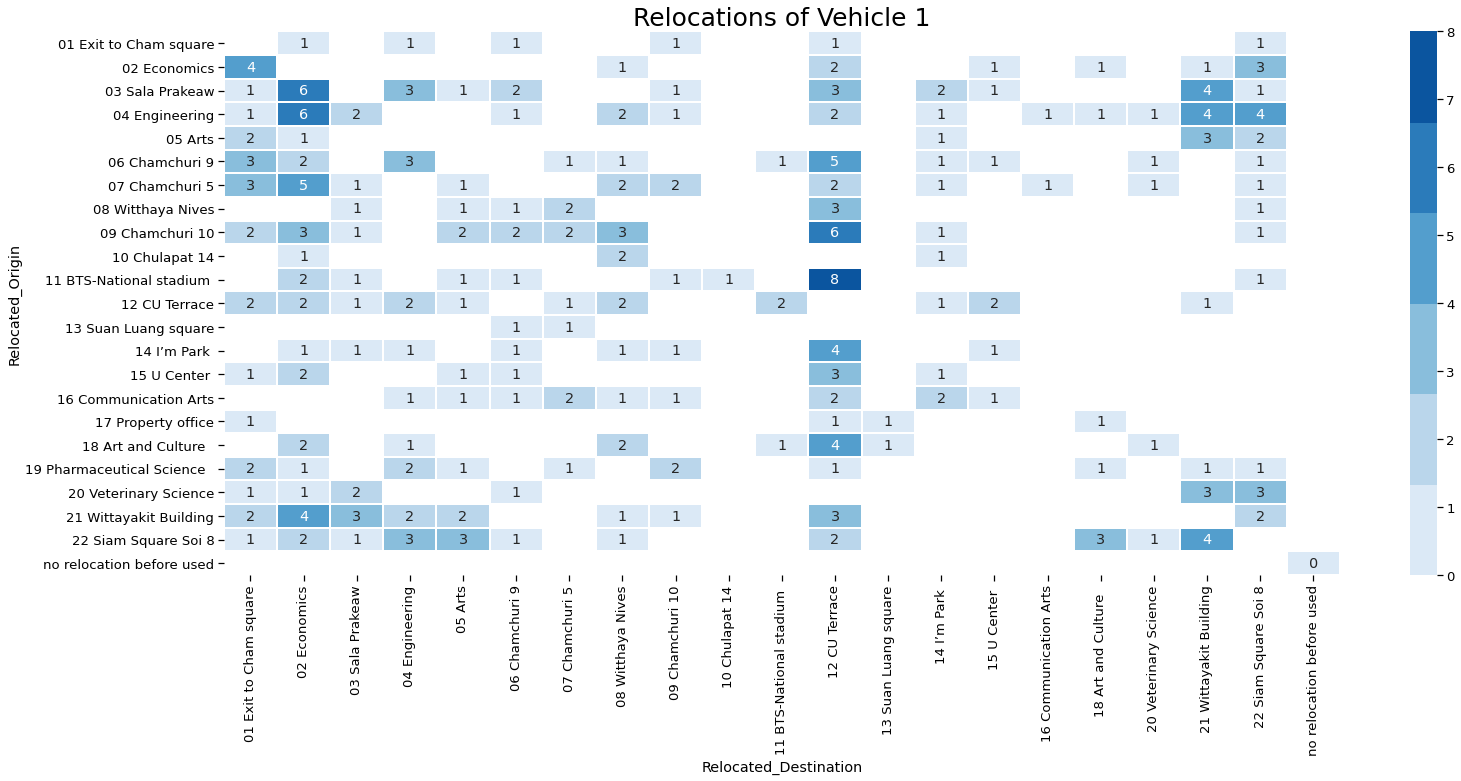

In [6]:
relocated = []
relocated_depart = []
relocated_dest = []
target_vehicle = 1

df_relocated = df_all[df_all['Vehicle name'] == target_vehicle]

depart = df_relocated.loc[ : , 'Station_depart.' ]
dest = df_relocated.loc[ : , 'Station_dest.' ]
index = list(df_relocated.index.values)

relocated_depart.append('no relocation before used')
relocated_dest.append('no relocation before used')
relocated.append(0)
i = 0        
while i < len(df_relocated)-1:
    if dest[index[i]] != depart[index[i+1]]:
        relocated_depart.append(dest[index[i]])
        relocated_dest.append(depart[index[i+1]])
        relocated.append(1)
        i = i + 1
    else:
        relocated_depart.append('no relocation before used')
        relocated_dest.append('no relocation before used')
        relocated.append(0)
        i = i + 1

df_relocated['Relocated'] = relocated
df_relocated['Relocated_Origin'] = relocated_depart
df_relocated['Relocated_Destination'] = relocated_dest
df_relocated3 = df_relocated.pivot_table(index='Relocated_Origin', columns='Relocated_Destination', values='Relocated', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_relocated3, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)
title = 'Relocations of Vehicle ' + str(target_vehicle)
plt.title(label = title, fontsize = 25)

***TIME WHEN RELOCATIONS HAPPEN MOST BASED ON THE NEXT REGISTERATION TIME OF A VEHICLE***

In [ ]:
each_vehicle = dict.fromkeys(df_close['Vehicle name'])
each_vehicle_list = list(each_vehicle)
each_date = dict.fromkeys(df_close['Date'])
each_date_list = list(each_date)

# ind_converted_regist = []
# for slot in df_2018s2['regist_dt_ICT']:
#     (h, m, s) = slot.split(':')
#     if (int(m) >= 30):
#         time = int(h) + 0.5
#     else:
#         time = int(h)
#     ind_converted_regist.append(time)
# df_2018s2['Converted_Regist.'] = ind_converted_regist

for date in each_date_list:
    df = df_close[df_close['Date'] == date]
    counter = 0
    for vehicle in each_vehicle_list:
#         print(vehicle, date)
#         relocated_depart = []
#         relocated_dest = []
#         relocated = []
        total = 0
        df_relocated = df[df['Vehicle name'] == vehicle]
#         if(len(df_relocated) == 0):
#             continue
        print(vehicle, date)
        depart = df_relocated.loc[ : , 'Station_depart.' ]
        dest = df_relocated.loc[ : , 'Station_dest.' ]
        index = list(df_relocated.index.values)

#         relocated_depart.append('no relocation before used')
#         relocated_dest.append('no relocation before used')
#         relocated.append(0)
        i = 0
        while i < len(df_relocated)-1:
            if dest[index[i]] != depart[index[i+1]]:
#                 relocated_depart.append(dest[index[i]])
#                 relocated_dest.append(depart[index[i+1]])
#                 relocated.append(1)
                counter += 1
                print(counter)
#             else:
#                 relocated_depart.append('no relocation before used')
#                 relocated_dest.append('no relocation before used')
#                 relocated.append(0)
            i += 1
        total += counter
#         each_vehicle.update({vehicle: counter})
    
    each_date.update({date: total})

# df_merged_no_hol['Converted_Regist'] = ind_converted_regist
# df_merged_no_hol['Relocated'] = relocated
# df_merged_no_hol['Relocated_depart'] = relocated_depart
# df_merged_no_hol['Relocated_dest'] = relocated_dest
# df_relocated3 = df_merged_no_hol.pivot_table(index='Relocated_dest', columns='Converted_Regist', values='Relocated', aggfunc=np.sum)
# plt.figure(figsize=(25,10))
# sns.set_context(context='notebook',font_scale=1.2)
# sns.heatmap(df_relocated3, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)
# title = 'Relocations of Vehicle ' + str(target_vehicle)
# plt.title(label = title, fontsize = 25)

In [ ]:
print(each_date)

In [ ]:
for_pimpim = pd.DataFrame.from_dict(each_date, orient='index')
for_pimpim = for_pimpim.reset_index()

In [ ]:
for_pimpim.to_csv(r'for_pimpim.csv', index = False)

***BALANCE OF EACH STATION (NEGLECT THE MOST LEFT COLUMN WHICH IS ALL 0)***

In [ ]:
#balance of each station in each day (station vs time)
#don't know the numbers of vehicle at each station at the beginning of the day

target_date = '2/1/2019'
df_balance = df[df['Date'] == target_date]
depart_balance = df_balance.loc[ : , 'Station_depart.' ]
dest_balance = df_balance.loc[ : , 'Station_dest.' ]

depart_time_list = []
arrive_time_list = []
for slot in df_balance['start_dt_ICT']:
    (h, m, s) = slot.split(':')
    if (int(m) >= 30):
        time = int(h) + 0.5
    else:
        time = int(h)
    depart_time_list.append(time)
df_balance['Depart_time'] = depart_time_list
depart_time = df_balance['Depart_time']

df_balance.fillna(value=0, inplace=True)
counter = 0
for slot in df_balance['end_dt_ICT']:
    if slot == 0:
        arrive_time_list.append(depart_time[counter])
    else:
        (h, m, s) = slot.split(':')
        time = int(h) + int(m)/60 + int(s)/3600
        rounded = round(time,2)
        if ((rounded*10)%10) < 5:
            arrive_time_list.append(math.floor(time))
        else:
            arrive_time_list.append(math.floor(time)+0.5)
    counter += 1
df_balance['Arrive_time'] = arrive_time_list
arrive_time = df_balance['Arrive_time']

index = list(df_balance.index.values)
all_stations = list(dict.fromkeys(list(dict.fromkeys(depart_balance)) + list(dict.fromkeys(dest_balance))))
stations = {}
for station in all_stations:
    stations[station.format(station)] = 0

balance = []
current_station = []
time_change = []
for station in all_stations:
    counter = 0
    i = 0
    while i < len(df_balance):
        current_station.append(station)
        if station == depart_balance[index[i]]:
            counter -= 1
            stations.update({station: counter})
            balance.append(stations.get(station))
            time_change.append(depart_time[index[i]])
        elif station == dest_balance[index[i]]:
            counter += 1
            stations.update({station: counter})
            balance.append(stations.get(station))
            time_change.append(arrive_time[index[i]])
        else:
            balance.append(0)
            time_change.append(0)
        i += 1
data = {'Stations':current_station, 'Time':time_change, 'Balance':balance}    
df_balance_new = pd.DataFrame(data)
df_balance2 = df_balance_new.pivot_table(index='Stations', columns='Time', values='Balance')
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_balance2,cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1, cbar=False)

***USAGE OF ALL 9 MONTHS AND EACH MONTH***

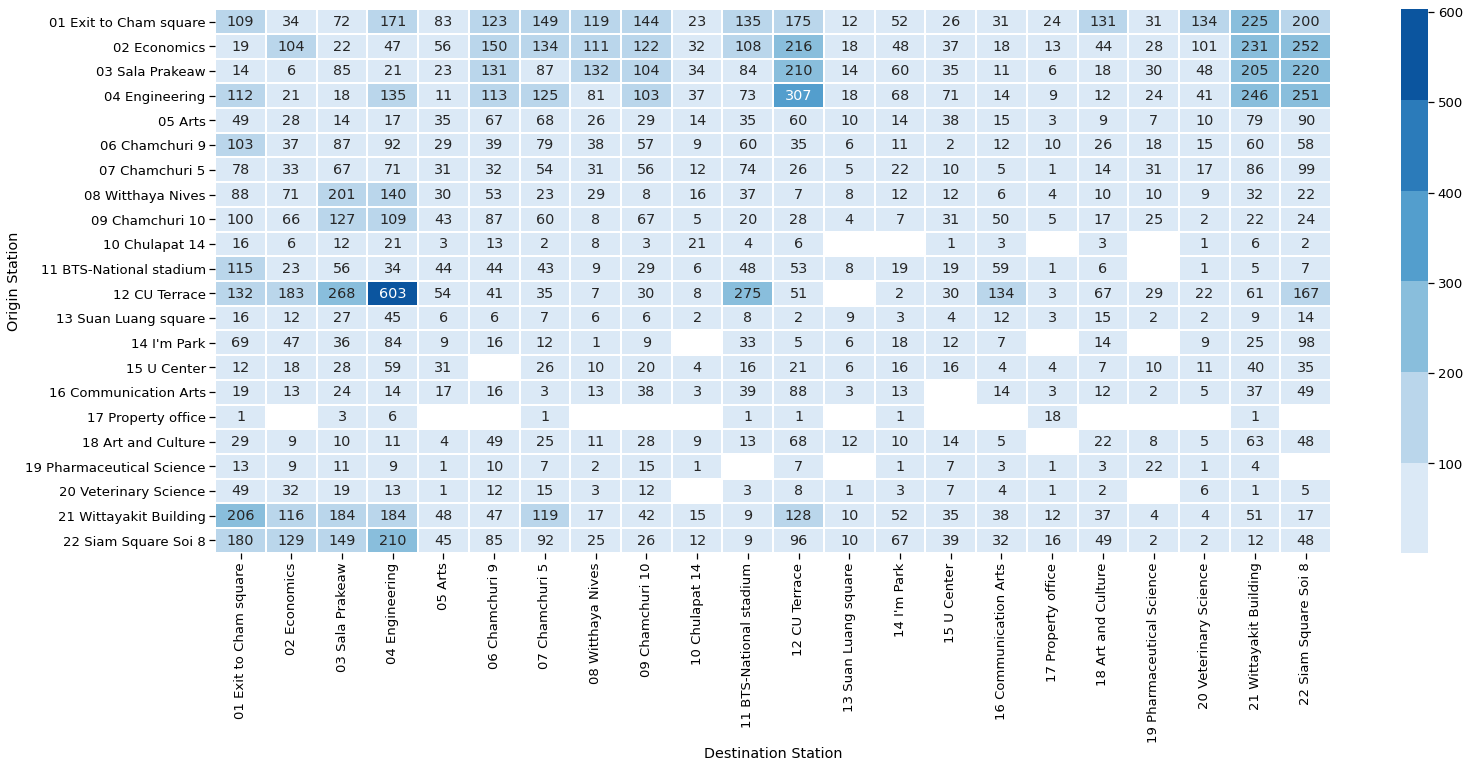

In [5]:
demand = []
demand = [1] * len(df_merged)
df_merged['Demand'] = demand

df_mergedv2 = df_merged.rename(columns={'Station_depart.': 'Origin Station', 'Station_dest.': 'Destination Station'})

df_all2 = df_mergedv2.pivot_table(index='Origin Station', columns='Destination Station', values='Demand', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_all2, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)
# plt.title('Total Demands in 9 Months', fontsize = 25)

In [ ]:
converted_start_jan = []

for slot in df_jan['start_dt_ICT']:
    (h, m, s) = slot.split(':')
    cell = int(h) + int(m)/60 + int(s)/3600
    converted_start_jan.append(math.floor(cell))    

df_jan['Converted_Start'] = converted_start_jan

#df_jan2 = df_jan.query('Occupation == "University student (CU)" and Converted_Start < 9')
df_jan3 = df_jan.pivot_table(index='Station_depart.', columns='Station_dest.', values='Usage\'', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_jan3, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)
plt.title('Usage in January', fontsize = 25)

In [ ]:
converted_start_feb = []

for slot in df_feb['start_dt_ICT']:
    (h, m, s) = slot.split(':')
    cell = int(h) + int(m)/60 + int(s)/3600
    converted_start_feb.append(math.floor(cell))    

df_feb['Converted_Start'] = converted_start_feb

#df_jan2 = df_jan.query('Occupation == "University student (CU)" and Converted_Start < 9')
df_feb3 = df_feb.pivot_table(index='Station_depart.', columns='Station_dest.', values='Usage\'', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_feb3, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)
plt.title('Usage in Febuary', fontsize = 25)

In [ ]:
converted_start_mar = []

for slot in df_mar['start_dt_ICT']:
    (h, m, s) = slot.split(':')
    cell = int(h) + int(m)/60 + int(s)/3600
    converted_start_mar.append(math.floor(cell))    

df_mar['Converted_Start'] = converted_start_mar

#df_jan2 = df_jan.query('Occupation == "University student (CU)" and Converted_Start < 9')
df_mar3 = df_mar.pivot_table(index='Station_depart.', columns='Station_dest.', values='Usage\'', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_mar3, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)
plt.title('Usage in March', fontsize = 25)

In [ ]:
converted_start_apr = []

for slot in df_apr['start_dt_ICT']:
    (h, m, s) = slot.split(':')
    cell = int(h) + int(m)/60 + int(s)/3600
    converted_start_apr.append(math.floor(cell))    

df_apr['Converted_Start'] = converted_start_apr

#df_jan2 = df_jan.query('Occupation == "University student (CU)" and Converted_Start < 9')
df_apr3 = df_apr.pivot_table(index='Station_depart.', columns='Station_dest.', values='Usage\'', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_apr3, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)
plt.title('Usage in April', fontsize = 25)

In [ ]:
converted_start_may = []

for slot in df_may['start_dt_ICT']:
    (h, m, s) = slot.split(':')
    cell = int(h) + int(m)/60 + int(s)/3600
    converted_start_may.append(math.floor(cell))    

df_may['Converted_Start'] = converted_start_may

#df_jan2 = df_jan.query('Occupation == "University student (CU)" and Converted_Start < 9')
df_may3 = df_may.pivot_table(index='Station_depart.', columns='Station_dest.', values='Usage\'', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_may3, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)
plt.title('Usage in May', fontsize = 25)

In [ ]:
converted_start_jun = []

for slot in df_jun['start_dt_ICT']:
    (h, m, s) = slot.split(':')
    cell = int(h) + int(m)/60 + int(s)/3600
    converted_start_jun.append(math.floor(cell))    

df_jun['Converted_Start'] = converted_start_jun

#df_jan2 = df_jan.query('Occupation == "University student (CU)" and Converted_Start < 9')
df_jun3 = df_jun.pivot_table(index='Station_depart.', columns='Station_dest.', values='Usage\'', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_jun3, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)
plt.title('Usage in June', fontsize = 25)

In [ ]:
converted_start_jul = []

for slot in df_jul['start_dt_ICT']:
    (h, m, s) = slot.split(':')
    cell = int(h) + int(m)/60 + int(s)/3600
    converted_start_jul.append(math.floor(cell))    

df_jul['Converted_Start'] = converted_start_jul

#df_jan2 = df_jan.query('Occupation == "University student (CU)" and Converted_Start < 9')
df_jul3 = df_jul.pivot_table(index='Station_depart.', columns='Station_dest.', values='Usage\'', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_jul3, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)
plt.title('Usage in July', fontsize = 25)

In [ ]:
converted_start_aug = []

for slot in df_aug['start_dt_ICT']:
    (h, m, s) = slot.split(':')
    cell = int(h) + int(m)/60 + int(s)/3600
    converted_start_aug.append(math.floor(cell))    

df_aug['Converted_Start'] = converted_start_aug

#df_jan2 = df_jan.query('Occupation == "University student (CU)" and Converted_Start < 9')
df_aug3 = df_aug.pivot_table(index='Station_depart.', columns='Station_dest.', values='Usage\'', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_aug3, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)
plt.title('Usage in August', fontsize = 25)

In [ ]:
converted_start_sep = []

for slot in df_sep['start_dt_ICT']:
    (h, m, s) = slot.split(':')
    cell = int(h) + int(m)/60 + int(s)/3600
    converted_start_sep.append(math.floor(cell))    

df_sep['Converted_Start'] = converted_start_sep

#df_jan2 = df_jan.query('Occupation == "University student (CU)" and Converted_Start < 9')
df_sep3 = df_sep.pivot_table(index='Station_depart.', columns='Station_dest.', values='Usage\'', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_sep3, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)
plt.title('Usage in September', fontsize = 25)

***ALL USAGE AND TIME PERIOD*** ex. 7 means 07:00:00 - 07:59:59

In [ ]:
converted_start_all = []

for slot in df_all['start_dt_ICT']:
    (h, m, s) = slot.split(':')
    cell = int(h) + int(m)/60 + int(s)/3600
    converted_start_all.append(math.floor(cell))    

df_all['Converted_Start'] = converted_start_all

#df_jan2 = df_jan.query('Occupation == "University student (CU)" and Converted_Start < 9')
df_all3 = df_all.pivot_table(index='Station_depart.', columns='Converted_Start', values='Usage\'', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_all3, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)
#plt.title('Usage in September', fontsize = 25)

In [12]:
converted_regist = []

for slot in df_merged['regist_dt_ICT']:
    (h, m) = slot.split(':')
    time = int(h)
    converted_regist.append(time)    

df_merged['Converted_Regist'] = converted_regist


each_hour = list(dict.fromkeys(df_merged['Converted_Regist']))
total = 0
previous = 0
different = 0
each_hour.sort()
for each in each_hour:
    for value in df_merged['Converted_Regist']:
        if each == value:
            total += 1
    if previous != 0:
        different = total - previous
    print(each, total, '>> difference = ' + str(different))
    previous = total
    total = 0

7 932 >> difference = 0
8 1537 >> difference = 605
9 1285 >> difference = -252
10 1027 >> difference = -258
11 1275 >> difference = 248
12 2164 >> difference = 889
13 1425 >> difference = -739
14 1290 >> difference = -135
15 2223 >> difference = 933
16 2906 >> difference = 683
17 1674 >> difference = -1232
18 1370 >> difference = -304
19 405 >> difference = -965
20 285 >> difference = -120
23 1 >> difference = -284


|Begin|End|Usage|Difference|Demand|Difference|
|-----|---|-----|----------|------|----------|
|07:00|07:59| <center> 706 | <center> - | <center> 932| <center> -|
|08:00|08:59| <center> 1161 | <center> +455 | <center> 1537| <center> +605|
|09:00|09:59| <center> 1042 | <center> -119 | <center> 1285| <center> -252|
|10:00|10:59| <center> 846 | <center> -196 | <center> 1027| <center> -258|
|11:00|11:59| <center> 997 | <center> +151 | <center> 1275| <center> +248|
|12:00|12:59| <center> 1602 | <center> +605 | <center> 2164| <center> +889|
|13:00|13:59| <center> 1158 | <center> -444 | <center> 1425| <center> -739|
|14:00|14:59| <center> 1018 | <center> -140 | <center> 1290| <center> -135|
|15:00|15:59| <center> 1526 | <center> +508 | <center> 2223| <center> +933|
|16:00|16:59| <center> 1877 | <center> +351 | <center> 2906| <center> +683|
|17:00|17:59| <center> 1237 | <center> -640 | <center> 1674| <center> -1232|
|18:00|18:59| <center> 1046 | <center> -191 | <center> 1370| <center> -304|
|19:00|19:59| <center> 309 | <center> -737 | <center> 405| <center> -965|
|20:00|20:59| <center> 234 | <center> -75 | <center> 285| <center> -120|

***USAGE/PURE DEMAND OF ALL/OPEN SEMESTER/CLOSE SEMESTER*** NOTE THAT PURE DEMAND USAGE + FAILED SEARCH

In [ ]:
demand = []
i = 0
while i < len(df_merged):
    demand.append(1)
    i += 1
    
df_merged['Demand'] = demand

converted_regist_merged = []
for slot in df_merged['regist_dt_ICT']:
    (h, m, s) = slot.split(':')
    cell = int(h) + int(m)/60 + int(s)/3600
    converted_regist_merged.append(math.floor(cell))    

df_merged['Converted_Regist'] = converted_regist_merged

df_merged2 = df_merged.pivot_table(index='Station_depart.', columns='Converted_Regist', values='Demand', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_merged2, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)
plt.title('Pure Demand vs Time', fontsize = 25)

each_hour = list(dict.fromkeys(df_merged['Converted_Regist']))
total = 0
previous = 0
different = 0
each_hour.sort()
for each in each_hour:
    for value in df_merged['Converted_Regist']:
        if each == value:
            total += 1
    if previous != 0:
        different = total - previous
    print(each, total, '>> difference = ' + str(different))
    previous = total
    total = 0

In [ ]:
usage_open = []
i = 0
while i < len(df_open):
    usage_open.append(1)
    i += 1
    
# df_merged['Demand'] = demand

converted_regist_open = []
for slot in df_open['regist_dt_ICT']:
    (h, m, s) = slot.split(':')
    cell = int(h) + int(m)/60 + int(s)/3600
    converted_regist_open.append(math.floor(cell))    

df_open['Converted_Regist'] = converted_regist_open

df_open2 = df_open.pivot_table(index='Station_depart.', columns='Converted_Regist', values='Usage\'', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_open2, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)
plt.title('Usage during open semester', fontsize = 25)

each_hour = list(dict.fromkeys(df_open['Converted_Regist']))
total = 0
previous = 0
different = 0
each_hour.sort()
for each in each_hour:
    for value in df_open['Converted_Regist']:
        if each == value:
            total += 1
    if previous != 0:
        different = total - previous
    print(each, total, '>> difference = ' + str(different))
    previous = total
    total = 0

In [ ]:
demand_open = []
i = 0
while i < len(df_open_merged):
    demand_open.append(1)
    i += 1
    
df_open_merged['Demand'] = demand_open

converted_regist_open = []
for slot in df_open_merged['regist_dt_ICT']:
    (h, m, s) = slot.split(':')
    cell = int(h) + int(m)/60 + int(s)/3600
    converted_regist_open.append(math.floor(cell))    

df_open_merged['Converted_Regist'] = converted_regist_open

df_open_merged2 = df_open_merged.pivot_table(index='Station_depart.', columns='Converted_Regist', values='Demand', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_open_merged2, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)
plt.title('Demand during open semester', fontsize = 25)

each_hour = list(dict.fromkeys(df_open_merged['Converted_Regist']))
total = 0
previous = 0
different = 0
each_hour.sort()
for each in each_hour:
    for value in df_open_merged['Converted_Regist']:
        if each == value:
            total += 1
    if previous != 0:
        different = total - previous
    print(each, total, '>> difference = ' + str(different))
    previous = total
    total = 0

In [ ]:
converted_regist_close = []
for slot in df_close['regist_dt_ICT']:
    (h, m, s) = slot.split(':')
    cell = int(h) + int(m)/60 + int(s)/3600
    converted_regist_close.append(math.floor(cell))    

df_close['Converted_Regist'] = converted_regist_close

df_close2 = df_close.pivot_table(index='Station_depart.', columns='Converted_Regist', values='Usage\'', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_close2, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)
plt.title('Usage during close semester', fontsize = 25)

each_hour = list(dict.fromkeys(df_close['Converted_Regist']))
total = 0
previous = 0
different = 0
each_hour.sort()
for each in each_hour:
    for value in df_close['Converted_Regist']:
        if each == value:
            total += 1
    if previous != 0:
        different = total - previous
    print(each, total, '>> difference = ' + str(different))
    previous = total
    total = 0

In [ ]:
demand_close = []
i = 0
while i < len(df_close_merged):
    demand_close.append(1)
    i += 1
    
df_close_merged['Demand'] = demand_close

converted_regist_close = []
for slot in df_close_merged['regist_dt_ICT']:
    (h, m, s) = slot.split(':')
    cell = int(h) + int(m)/60 + int(s)/3600
    converted_regist_close.append(math.floor(cell))    

df_close_merged['Converted_Regist'] = converted_regist_close

df_close_merged2 = df_close_merged.pivot_table(index='Station_depart.', columns='Converted_Regist', values='Demand', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_close_merged2, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)
plt.title('Demand during close semester', fontsize = 25)

each_hour = list(dict.fromkeys(df_close_merged['Converted_Regist']))
total = 0
previous = 0
different = 0
each_hour.sort()
for each in each_hour:
    for value in df_close_merged['Converted_Regist']:
        if each == value:
            total += 1
    if previous != 0:
        different = total - previous
    print(each, total, '>> difference = ' + str(different))
    previous = total
    total = 0

In [ ]:
converted_start_all = []

for slot in df_all['start_dt_ICT']:
    (h, m, s) = slot.split(':')
    cell = int(h) + int(m)/60 + int(s)/3600
    rounded = round(cell,2)
    if (rounded*10)%10 <= 5:
        converted_start_all.append(math.floor(rounded))
    else:
        converted_start_all.append(math.floor(cell)+0.5)

df_all['Converted_Start'] = converted_start_all
df_all3 = df_all.pivot_table(index='Station_depart.', columns='Converted_Start', values='Usage\'', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_all3, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)
#plt.title('Usage in September', fontsize = 25)

each_hour = list(dict.fromkeys(df_all['Converted_Start']))
each_hour.sort()
total = 0
previous = 0
different = 0
for each in each_hour:
    for value in df_all['Converted_Start']:
        if each == value:
            total += 1
    if previous != 0:
        different = total - previous
    print(each, total, '>> difference = ' + str(different))
    previous = total
    total = 0

***USAGE OF EACH DAY***

In [ ]:
mon = ['7/1/2019', '14/1/2019', '21/1/2019', '28/1/2019', '4/2/2019', '11/2/2019', '18/2/2019', '25/2/2019', '4/3/2019', '11/3/2019', '18/3/2019', '25/3/2019', '1/4/2019', '22/4/2019', '29/4/2019', '13/5/2019', '27/5/2019', '10/6/2019', '17/6/2019', '24/6/2019', '1/7/2019', '8/7/2019', '15/7/2019', '22/7/2019', '5/8/2019', '12/8/2019', '19/8/2019', '26/8/2019', '2/9/2019', '9/9/2019', '16/9/2019', '23/9/2019', '30/9/2019']
tue = ['8/1/2019', '15/1/2019', '22/1/2019', '29/1/2019', '5/2/2019', '12/2/2019', '26/2/2019', '5/3/2019', '12/3/2019', '19/3/2019', '26/3/2019', '2/4/2019', '9/4/2019', '23/4/2019', '30/4/2019', '7/5/2019', '14/5/2019', '21/5/2019', '28/5/2019', '4/6/2019', '11/6/2019', '18/6/2019', '25/6/2019', '2/7/2019', '9/7/2019', '23/7/2019', '30/7/2019', '6/8/2019', '13/8/2019', '20/8/2019', '27/8/2019', '3/9/2019', '10/9/2019', '17/9/2019', '24/9/2019']
wed = ['2/1/2019', '9/1/2019', '16/1/2019', '23/1/2019', '30/1/2019', '6/2/2019', '13/2/2019', '20/2/2019', '27/2/2019', '6/3/2019', '13/3/2019', '20/3/2019', '27/3/2019', '3/4/2019', '10/4/2019', '17/4/2019', '24/4/2019', '1/5/2019', '8/5/2019', '15/5/2019', '22/5/2019', '29/5/2019', '5/6/2019', '12/6/2019', '19/6/2019', '26/6/2019', '3/7/2019', '10/7/2019', '24/7/2019', '31/7/2019', '7/8/2019', '14/8/2019', '21/8/2019', '28/8/2019', '4/9/2019', '11/9/2019', '18/9/2019', '25/9/2019']
thu = ['3/1/2019', '10/1/2019', '17/1/2019', '24/1/2019', '31/1/2019', '7/2/2019', '14/2/2019', '21/2/2019', '28/2/2019', '7/3/2019', '14/3/2019', '21/3/2019', '28/3/2019', '4/4/2019', '11/4/2019', '18/4/2019', '25/4/2019', '2/5/2019', '16/5/2019', '23/5/2019', '30/5/2019', '6/6/2019', '13/6/2019', '20/6/2019', '27/6/2019', '4/7/2019', '11/7/2019', '18/7/2019', '25/7/2019', '1/8/2019', '8/8/2019', '15/8/2019', '22/8/2019', '29/8/2019', '5/9/2019', '12/9/2019', '19/9/2019', '26/9/2019']
fri = ['4/1/2019', '11/1/2019', '18/1/2019', '25/1/2019', '1/2/2019', '8/2/2019', '15/2/2019', '22/2/2019', '1/3/2019', '8/3/2019', '15/3/2019', '22/3/2019', '29/3/2019', '5/4/2019', '19/4/2019', '26/4/2019', '3/5/2019', '10/5/2019', '17/5/2019', '24/5/2019', '31/5/2019', '7/6/2019', '14/6/2019', '21/6/2019', '28/6/2019', '5/7/2019', '12/7/2019', '19/7/2019', '26/7/2019', '2/8/2019', '9/8/2019', '16/8/2019', '23/8/2019', '30/8/2019', '6/9/2019', '13/9/2019', '20/9/2019', '27/9/2019']

day = []
for slot in df_all['Date']:
    if slot in mon:
        day.append('mon')
    if slot in tue:
        day.append('tue')
    if slot in wed:
        day.append('wed')
    if slot in thu:
        day.append('thu')
    if slot in fri:
        day.append('fri')
df_all['day'] = day        

converted_regist = []
for slot in df_all['regist_dt_ICT']:
    (h, m, s) = slot.split(':')
    cell = int(h) + int(m)/60 + int(s)/3600
    converted_regist.append(math.floor(cell))
df_all['Converted Regist'] = converted_regist
df_all_new = df_all.query('day == "mon"')
df_all_new2 = df_all_new.pivot_table(index='Station_depart.', columns='Converted Regist', values='Usage\'', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_all_new2, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)
plt.title('Usage on Monday', fontsize = 25)

each_hour = list(dict.fromkeys(df_all_new['Converted Regist']))
each_hour.sort()
total = 0
previous = 0
different = 0
hour_mon = []
amount_mon = []
for each in each_hour:
    hour_mon.append(each)
    for value in df_all_new['Converted Regist']:
        if each == value:
            total += 1
    amount_mon.append(total)
    if previous != 0:
        different = total - previous
    print(each, total, '>> difference = ' + str(different))
    previous = total
    total = 0
fig = plt.figure()
plt.scatter(hour_mon, amount_mon, label = 'time vs amount')
plt.plot(hour_mon, amount_mon)
plt.grid(linestyle='--', linewidth=0.25)
plt.legend(loc='upper center', bbox_to_anchor=(1.25, 0.8), shadow=True, ncol=1)

In [ ]:
df_all_new2 = df_all.query('day == "tue"')
df_all_new3 = df_all_new2.pivot_table(index='Station_depart.', columns='Converted Regist', values='Usage\'', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_all_new3, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)
plt.title('Usage on Tuesday', fontsize = 25)

each_hour = list(dict.fromkeys(df_all_new2['Converted Regist']))
each_hour.sort()
total = 0
previous = 0
different = 0
each_hour = list(dict.fromkeys(df_all_new2['Converted Regist']))
each_hour.sort()
total = 0
previous = 0
different = 0
hour_tue = []
amount_tue = []
for each in each_hour:
    hour_tue.append(each)
    for value in df_all_new2['Converted Regist']:
        if each == value:
            total += 1
    amount_tue.append(total)
    if previous != 0:
        different = total - previous
    print(each, total, '>> difference = ' + str(different))
    previous = total
    total = 0
fig = plt.figure()
plt.scatter(hour_tue, amount_tue, label = 'time vs amount')
plt.plot(hour_tue, amount_tue)
plt.grid(linestyle='--', linewidth=0.25)
plt.legend(loc='upper center', bbox_to_anchor=(1.25, 0.8), shadow=True, ncol=1)

In [ ]:
df_all_new2 = df_all.query('day == "wed"')
df_all_new3 = df_all_new2.pivot_table(index='Station_depart.', columns='Converted Regist', values='Usage\'', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_all_new3, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)
plt.title('Usage on Wednesday', fontsize = 25)

each_hour = list(dict.fromkeys(df_all_new2['Converted Regist']))
each_hour.sort()
total = 0
previous = 0
different = 0
hour_wed = []
amount_wed = []
for each in each_hour:
    hour_wed.append(each)
    for value in df_all_new2['Converted Regist']:
        if each == value:
            total += 1
    amount_wed.append(total)
    if previous != 0:
        different = total - previous
    print(each, total, '>> difference = ' + str(different))
    previous = total
    total = 0
fig = plt.figure()
plt.scatter(hour_wed, amount_wed, label = 'time vs amount')
plt.plot(hour_wed, amount_wed)
plt.grid(linestyle='--', linewidth=0.25)
plt.legend(loc='upper center', bbox_to_anchor=(1.25, 0.8), shadow=True, ncol=1)

In [ ]:
df_all_new2 = df_all.query('day == "thu"')
df_all_new3 = df_all_new2.pivot_table(index='Station_depart.', columns='Converted Regist', values='Usage\'', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_all_new3, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)
plt.title('Usage on Thursday', fontsize = 25)

each_hour = list(dict.fromkeys(df_all_new2['Converted Regist']))
each_hour.sort()
total = 0
previous = 0
different = 0
hour_thu = []
amount_thu = []
for each in each_hour:
    hour_thu.append(each)
    for value in df_all_new2['Converted Regist']:
        if each == value:
            total += 1
    amount_thu.append(total)
    if previous != 0:
        different = total - previous
    print(each, total, '>> difference = ' + str(different))
    previous = total
    total = 0
fig = plt.figure()
plt.scatter(hour_thu, amount_thu, label = 'time vs amount')
plt.plot(hour_thu, amount_thu)
plt.grid(linestyle='--', linewidth=0.25)
plt.legend(loc='upper center', bbox_to_anchor=(1.25, 0.8), shadow=True, ncol=1)

In [ ]:
df_all_new2 = df_all.query('day == "fri"')
df_all_new3 = df_all_new2.pivot_table(index='Station_depart.', columns='Converted Regist', values='Usage\'', aggfunc=np.sum)
plt.figure(figsize=(25,10))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(df_all_new3, cmap=sns.color_palette("Blues"), annot=True, fmt='.0f', linewidths = 1)
plt.title('Usage on Friday', fontsize = 25)

each_hour = list(dict.fromkeys(df_all_new2['Converted Regist']))
each_hour.sort()
total = 0
previous = 0
different = 0
hour_fri = []
amount_fri = []
for each in each_hour:
    hour_fri.append(each)
    for value in df_all_new2['Converted Regist']:
        if each == value:
            total += 1
    amount_fri.append(total)
    if previous != 0:
        different = total - previous
    print(each, total, '>> difference = ' + str(different))
    previous = total
    total = 0
fig = plt.figure()
plt.scatter(hour_fri, amount_fri, label = 'time vs amount')
plt.plot(hour_fri, amount_fri)
plt.grid(linestyle='--', linewidth=0.25)
plt.legend(loc='upper center', bbox_to_anchor=(1.25, 0.8), shadow=True, ncol=1)

In [ ]:
fig = plt.figure()
plt.scatter(hour_mon, amount_mon, label = 'Mon')
plt.plot(hour_mon, amount_mon)
plt.scatter(hour_tue, amount_tue, label = 'Tue')
plt.plot(hour_tue, amount_tue)
plt.scatter(hour_wed, amount_wed, label = 'Wed')
plt.plot(hour_wed, amount_wed)
plt.scatter(hour_thu, amount_thu, label = 'Thu')
plt.plot(hour_thu, amount_thu)
plt.scatter(hour_fri, amount_fri, label = 'Fri')
plt.plot(hour_fri, amount_fri)
plt.grid(linestyle='--', linewidth=0.25)
plt.legend(loc='upper center', bbox_to_anchor=(1.25, 0.8), shadow=True, ncol=1)

***BELOW THIS IS TOO MUCH TO UNDERSTAND, TELL ME IF YOU WANT TO KNOW ANYTHING***

In [ ]:
i = 0
usedVehicle = []
for vehicle in cellVehicle:
    if len(usedVehicle) == 0:
        #print('1st round')
        #print('current i =', i)
        x = cellStart[i]
        y = cellDepart[i]
        x2 = cellEnd[i]
        y2 = cellDest[i]
        plt.xlabel('time')
        plt.ylabel('station')
        plt.scatter(x,y)
        plt.scatter(x2,y2)
        #print('>>', usedVehicle)
        usedVehicle.append(vehicle)
    else:
        j = 0
        while j < len(usedVehicle):
            #print('j =', j)
            #print('current vehicle:', vehicle, 'current i =', cellStart[i])
            if vehicle == usedVehicle[j]:
                #print(vehicle, i, 'dup & used length =', len(usedVehicle))
                #print('current i =', i)
                x = cellStart[i]
                y = cellDepart[i]
                x2 = cellEnd[i]
                y2 = cellDest[i]
                plt.xlabel('time')
                plt.ylabel('station')
                plt.scatter(x,y)
                plt.scatter(x2,y2)
                break
            j = j+1
            if j == len(usedVehicle):
                #print(vehicle, 'not dup & used length =', len(usedVehicle))
                #print('current i =', i)
                usedVehicle.append(vehicle)
                #print(usedVehicle)
                x = cellStart[i]
                y = cellDepart[i]
                x2 = cellEnd[i]
                y2 = cellDest[i]
                plt.xlabel('time')
                plt.ylabel('station')
                plt.scatter(x,y)
                plt.scatter(x2,y2)
                break
    i = i+1

In [ ]:
i = 0
usedCounter = 0
start_end_per_vehicle = []
depart_dest_per_vehicle = []
date_used = []
previous_date = cellDate[i]

for used in usedVehicle:
    for vehicle in cellVehicle:
        if used == vehicle:
            start_end_per_vehicle.append(cellStart[i])
            start_end_per_vehicle.append(cellEnd[i])
            depart_dest_per_vehicle.append(cellDepart[i])
            depart_dest_per_vehicle.append(cellDest[i])
            date_used.append(cellDate[i])
        i = i + 1
        if i == len(cellVehicle):
            #for date in cellDate:
                
            fig = plt.figure()
            plt.scatter(start_end_per_vehicle,depart_dest_per_vehicle)
            plt.plot(start_end_per_vehicle,depart_dest_per_vehicle, label = used)
            plt.grid(linestyle='--', linewidth=0.25)
            plt.legend(loc='upper center', bbox_to_anchor=(1.2, 0.8), shadow=True, ncol=1)
            usedCounter = usedCounter + 1
            if usedCounter == len(usedVehicle):
                break
            i = 0
            start_end_per_vehicle = []
            depart_dest_per_vehicle = []

In [ ]:
each_date = list(dict.fromkeys(cellDate))
start_end_per_vehicle = []
depart_dest_per_vehicle = []
plt.rcParams.update({'figure.max_open_warning': 0})
currentVehicle = ''
currentDate = ''
i = 0
relocate_counter = 0

for used in usedVehicle:
    for date in each_date:
        for vehicle in cellVehicle:
            if i == len(cellVehicle):
                fig = plt.figure()
                plt.scatter(start_end_per_vehicle,depart_dest_per_vehicle)
                plt.plot(start_end_per_vehicle,depart_dest_per_vehicle)
                plt.plot(start_end_per_vehicle,depart_dest_per_vehicle, label = ('vehicle:', currentVehicle, 'date:', currentDate, 'relocate times:', relocate_counter))
                plt.grid(linestyle='--', linewidth=0.25)
                plt.legend(loc='upper center', bbox_to_anchor=(1.7, 0.8), shadow=True, ncol=1)                
                i = 0
                relocate_counter = 0
                start_end_per_vehicle = []
                depart_dest_per_vehicle = []
            elif (used == vehicle) & (date == cellDate[i]):
                start_end_per_vehicle.append(cellStart[i])
                start_end_per_vehicle.append(cellEnd[i])
                if (len(depart_dest_per_vehicle) > 0):
                    if (depart_dest_per_vehicle[-1] != cellDepart[i]):
                        relocate_counter += 1
                depart_dest_per_vehicle.append(cellDepart[i])
                depart_dest_per_vehicle.append(cellDest[i])
                currentVehicle = vehicle
                currentDate = date
            i = i + 1
            
fig = plt.figure()
plt.scatter(start_end_per_vehicle,depart_dest_per_vehicle)
plt.plot(start_end_per_vehicle,depart_dest_per_vehicle)
plt.plot(start_end_per_vehicle,depart_dest_per_vehicle, label = ('vehicle:', currentVehicle, 'date:', currentDate, 'relocate times:', relocate_counter))
plt.grid(linestyle='--', linewidth=0.25)
plt.legend(loc='upper center', bbox_to_anchor=(1.4, 0.8), shadow=True, ncol=1)

In [ ]:
# #connected scatter for each day of each vehicle 2-9 Jan 2019
# i = 0
# each_date = list(dict.fromkeys(cellDate))
# usedCounter = 0
# start_end_per_vehicle = []
# depart_dest_per_vehicle = []
# vehicle_and_date = [cellVehicle, cellDate]
# plt.rcParams.update({'figure.max_open_warning': 0})
# #print(usedVehicle,each_date)
# append = 0
# relocate_counter = 0
# for used in usedVehicle:
#     for eachDate in each_date:
#         while i < len(vehicle_and_date[1]):
#             if ((used == vehicle_and_date[0][i]) and (eachDate == vehicle_and_date[1][i])):
#                 start_end_per_vehicle.append(cellStart[i])
#                 start_end_per_vehicle.append(cellEnd[i])
#                 if (i > 0):
#                     if (depart_dest_per_vehicle[-1] != cellDepart[i]):
#                         print(depart_dest_per_vehicle[-1], cellDepart[i])
#                         relocate_counter += 1
#                 depart_dest_per_vehicle.append(cellDepart[i])
#                 depart_dest_per_vehicle.append(cellDest[i])
#                 #print('row', i, vehicle_and_date[0][i], vehicle_and_date[1][i], 'appended')
#                 append = append + 1
#             i = i + 1
#             if i == len(vehicle_and_date[1]):
#                 break
#         if i == len(vehicle_and_date[0]):
#             plt.figure(figsize=(25,10))
#             fig = plt.figure()
#             plt.scatter(start_end_per_vehicle,depart_dest_per_vehicle)
#             plt.plot(start_end_per_vehicle,depart_dest_per_vehicle, label = ('vehicle:', used, 'date:', eachDate, 'relocate times:', relocate_counter))
#             plt.grid(linestyle='--', linewidth=0.25)
#             plt.legend(loc='upper center', bbox_to_anchor=(1.5, 0.8), shadow=True, ncol=1)
#             i = 0
#             start_end_per_vehicle = []
#             depart_dest_per_vehicle = []
            
# print(append, 'times appended')

In [ ]:
i = 0
usedVehicle2 = []
for vehicle in cellVehicle:
    if len(usedVehicle2) == 0:
        x = cellStart[i]
        y = cellDepart[i]
        x2 = cellEnd[i]
        y2 = cellDest[i]
        plt.xlabel('time')
        plt.ylabel('station')
        plt.scatter(x,y,c='b')
        plt.scatter(x2,y2,c='b')
        usedVehicle2.append(vehicle)
    else:
        j = 0
        while j < len(usedVehicle2):
            if vehicle == usedVehicle2[j]:
                x = cellStart[i]
                y = cellDepart[i]
                x2 = cellEnd[i]
                y2 = cellDest[i]
                plt.xlabel('time')
                plt.ylabel('station')
                plt.scatter(x,y,c='b')
                plt.scatter(x2,y2,c='b')
            j = j+1
            if j == len(usedVehicle2):               
                break
    i = i+1
    
print(usedVehicle2)